In [ ]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

Saving beauty_cleaned.csv to beauty_cleaned.csv


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV (đặt đúng tên file bạn đã tải lên)
data = pd.read_csv("beauty_cleaned.csv")

# Hiển thị thông tin dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  int64  
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.5+ MB
None


In [ ]:
# Kiểm tra dữ liệu thiếu và bản sao
print("Số lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())
print("Số lượng bản sao:")
print(data.duplicated().sum())

Số lượng giá trị thiếu trong mỗi cột:
Product_Name         0
Brand                0
Category             0
Usage_Frequency      0
Price_USD            0
Rating               0
Number_of_Reviews    0
Product_Size         0
Skin_Type            0
Gender_Target        0
Packaging_Type       0
Main_Ingredient      0
Cruelty_Free         0
Country_of_Origin    0
dtype: int64
Số lượng bản sao:
0


In [ ]:
# Danh sách các cột cần giữ lại
columns_to_keep = ["Price_USD", "Rating", "Number_of_Reviews"]

# Xóa các cột không thuộc danh sách cần giữ lại
data_subset = data.drop(columns=[col for col in data.columns if col not in columns_to_keep])

# Loại bỏ các hàng chứa giá trị thiếu (nếu cần)
data_subset = data_subset.dropna()

# Hiển thị kết quả
print(data_subset.head())

   Price_USD  Rating  Number_of_Reviews
0      67.85     1.4                686
1     116.43     4.2               5483
2      90.84     1.6               5039
3      55.17     3.2               6202
4     140.56     1.7                297


In [ ]:
# Chuyển đổi dữ liệu thành ma trận numpy
X = data_subset.values

In [ ]:
X

array([[6.7850e+01, 1.4000e+00, 6.8600e+02],
       [1.1643e+02, 4.2000e+00, 5.4830e+03],
       [9.0840e+01, 1.6000e+00, 5.0390e+03],
       ...,
       [6.5370e+01, 4.2000e+00, 8.1100e+02],
       [5.9930e+01, 4.8000e+00, 5.4820e+03],
       [3.6960e+01, 1.1000e+00, 5.4520e+03]])

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Tìm số cụm tối ưu bằng phương pháp Elbow
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

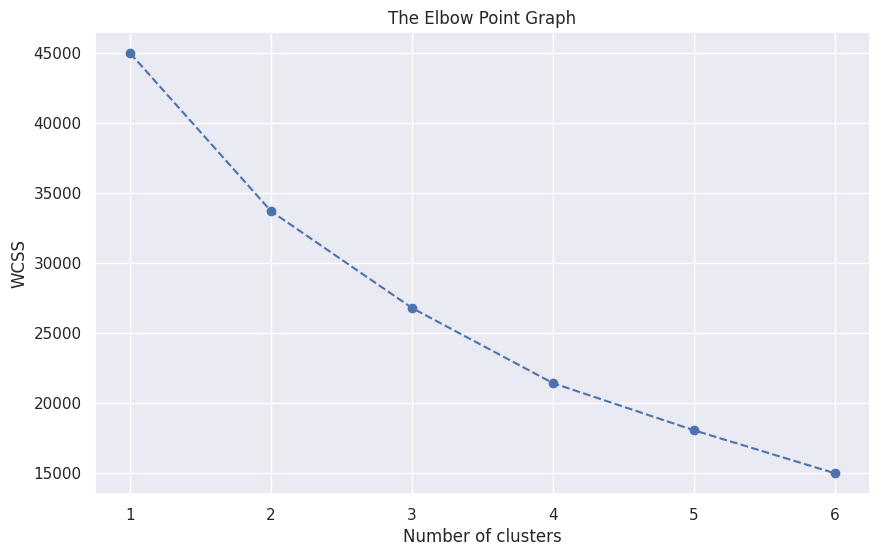

In [ ]:
# Vẽ đồ thị Elbow
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='--')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Phân cụm với số cụm = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X_scaled)

In [ ]:
# Gắn nhãn cụm vào dữ liệu gốc
data['Cluster'] = Y

# Hiển thị kết quả phân cụm
print("Nhãn cụm cho từng sản phẩm:")
print(Y)

Nhãn cụm cho từng sản phẩm:
[1 2 1 ... 2 2 1]


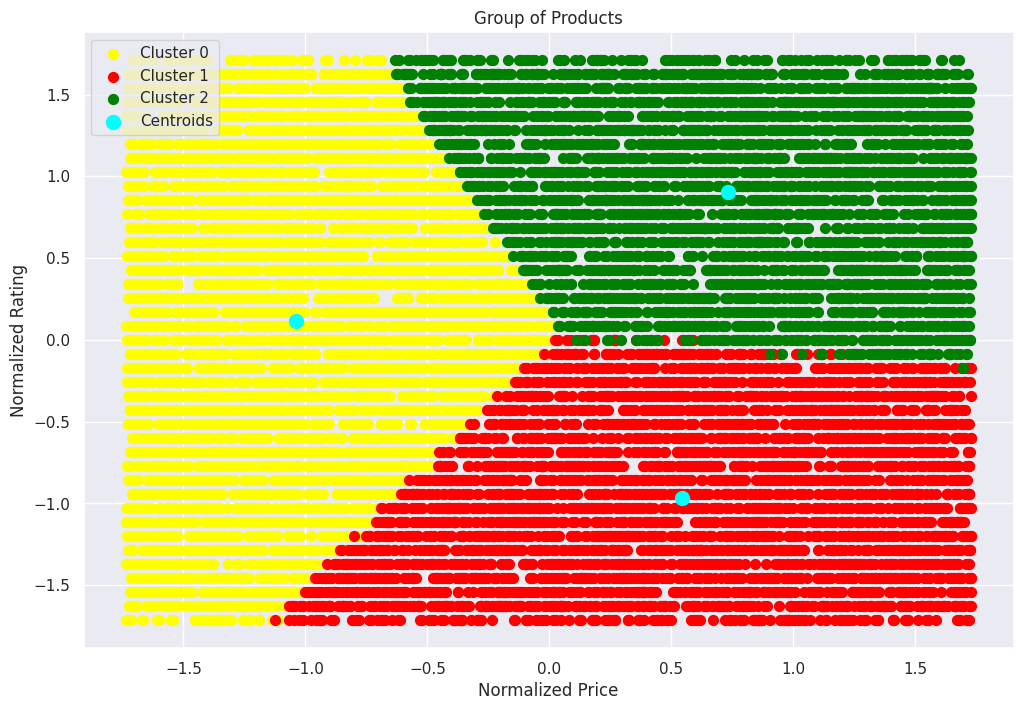

In [ ]:
# Trực quan hóa các cụm
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[Y == 0, 0], X_scaled[Y == 0, 1], s=50, c='yellow', label='Cluster 0')
plt.scatter(X_scaled[Y == 1, 0], X_scaled[Y == 1, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[Y == 2, 0], X_scaled[Y == 2, 1], s=50, c='green', label='Cluster 2')

# Plot các centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title("Group of Products")
plt.xlabel("Normalized Price")
plt.ylabel("Normalized Rating")
plt.legend()
plt.show()

In [ ]:
# Tạo file Excel với 4 sheet:
with pd.ExcelWriter('clustered_data.xlsx') as writer:
    # In dữ liệu gốc với cột Cluster_Label
    data.to_excel(writer, sheet_name='Raw_Data', index=False)

    # In dữ liệu cho Cluster 1
    cluster_0_data = data[data['Cluster'] == 0]
    cluster_0_data.to_excel(writer, sheet_name='Cluster_0', index=False)

    # In dữ liệu cho Cluster 2
    cluster_1_data = data[data['Cluster'] == 1]
    cluster_1_data.to_excel(writer, sheet_name='Cluster_1', index=False)

    # In dữ liệu cho Cluster 3
    cluster_2_data = data[data['Cluster'] == 2]
    cluster_2_data.to_excel(writer, sheet_name='Cluster_2', index=False)

from google.colab import files
files.download('clustered_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>